In [ ]:
# 1. Loading and Preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
df = pd.read_csv('CarPrice_Assignment.csv')
print(df)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
print(df.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [9]:
print(df.isnull().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [11]:
imputer = SimpleImputer(strategy='mean')
df_numeric = df.select_dtypes(include=[np.number])
df[df_numeric.columns] = imputer.fit_transform(df_numeric)

In [21]:
df_categorical = df.select_dtypes(include=['object'])
encoder = LabelEncoder()
for col in df_categorical.columns:
    df[col] = encoder.fit_transform(df[col])

In [25]:
scaler = StandardScaler()
features = df.drop('price', axis=1)
target = df['price']
features = scaler.fit_transform(features)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# 2. Model Implementation

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [29]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")

Linear Regression model trained.
Decision Tree model trained.
Random Forest model trained.
Gradient Boosting model trained.
Support Vector Regressor model trained.


In [ ]:
# 3. Model Evaluation

In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append((name, r2, mse, mae))

results_df = pd.DataFrame(results, columns=['Model', 'R2 Score', 'MSE', 'MAE'])
print(results_df)

                      Model  R2 Score           MSE          MAE
0         Linear Regression  0.844116  1.230612e+07  2087.306212
1             Decision Tree  0.879253  9.532216e+06  2090.699195
2             Random Forest  0.956941  3.399232e+06  1307.784707
3         Gradient Boosting  0.933080  5.282947e+06  1597.279091
4  Support Vector Regressor -0.100153  8.685053e+07  5696.707303


In [ ]:
# 4. Feature Importance Analysis

In [39]:
import matplotlib.pyplot as plt
best_model = models['Random Forest']
feature_importance = best_model.feature_importances_


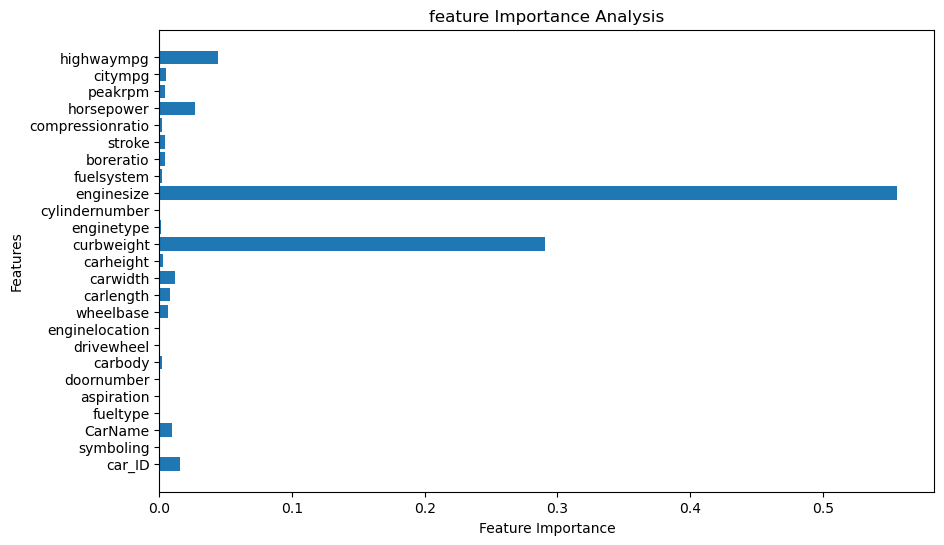

In [45]:
plt.figure(figsize=(10, 6))
plt.barh(df.drop('price', axis=1).columns, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("feature Importance Analysis")
plt.show()

In [ ]:
# 5. Hyperparameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model_tuned = grid_search.best_estimator_
y_pred_tuned = best_model_tuned.predict(X_test)

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [53]:
r2_tuned = r2_score(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
print(f"Tuned Model Performance:\n R2 Score: {r2_tuned}, MSE: {mse_tuned}, MAE: {mae_tuned}")

Tuned Model Performance:
 R2 Score: 0.9563110320615171, MSE: 3448982.7971462896, MAE: 1285.020588338829
